# Quantum Routines


The ``QRoutine`` object allows for the convenient creation of sub programs (akin to a re-useable sequence of gates) within a quantum program:

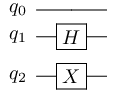

In [1]:
from qat.lang.AQASM import Program, QRoutine, X, H

# Creates a quantum routine consisting of a H gate on the first qubit, and a X gate on the second qubit
subprog = QRoutine()
subprog.apply(H, 0)
subprog.apply(X, 1)

# Now, create a program and apply the quantum routine to the qubit register
prog = Program()
qbits = prog.qalloc(3)
prog.apply(subprog, qbits[1:3])

circ = prog.to_circ()
%qatdisplay circ

``QRoutine``'s behave similarly to quantum gates. As a consequence, one can compose them:

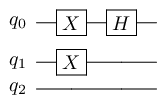

In [2]:
subprog2 = QRoutine()
subprog2.apply(X, 0)
subprog2.apply(subprog, 0, 1)

prog2 = Program()
qbits = prog2.qalloc(3)
prog2.apply(subprog2, qbits[0:2])

circ2 = prog2.to_circ()
%qatdisplay circ2

One can also apply the gate operators (ctrl, conj, dag etc.) to quantum routines, e.g:

In [3]:
conjsub = subprog.conj()
prog.apply(conjsub, qbits[0:2])

## More complex scenario

We can use build gate function

In [16]:
from qat.lang.AQASM import *

@build_gate("MyWalshHadamard", [int])
def constant_zero_oracle(nqubits):
    qrout = QRoutine()
    qreg = qrout.new_wires(nqubits)
    for qb in qreg:
        qrout.apply(H, qb)
    return qrout

Note that we cannot display the QRoutine as it is now

In [17]:
wh3 = constant_zero_oracle(3)
try:
    %qatdisplay wh3
except:
    print("Exception, no arity is defined")

Exception, no arity is defined


We can overcome this using an arity generator

In [18]:
@build_gate("MyWalshHadamard", [int], arity=lambda n:n)
def constant_zero_oracle(nqubits):
    qrout = QRoutine()
    qreg = qrout.new_wires(nqubits)
    for qb in qreg:
        qrout.apply(H, qb)
    return qrout

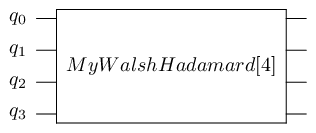

In [19]:
wh4 = constant_zero_oracle(4)
%qatdisplay wh4

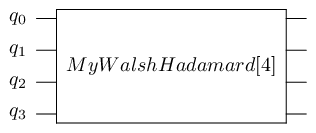

In [20]:
pr = Program()
qr = pr.qalloc(4)

pr.apply(wh4, qr)

cr = pr.to_circ()
%qatdisplay cr

## Replace gate set

[here](tutorials/lang/very_advanced_linker.ipynb) a more complex example.